# Email Marketting Campaign Success Prediction Project - P450

## Objective

The objective of this project is to predict whether a customer will open an email in an email marketing campaign. By building a classification model, the marketing team can identify high-potential customers, segment audiences, and tailor campaigns to optimize engagement. 
Predicting the open rate can help improve targeting, reduce marketing costs, and enhance overall campaign performance.


## Exploratory Data Analysis (EDA)

### Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [78]:
df = pd.read_excel(r"Email_Marketing_Campaign_Dataset_Rounded.xlsx")
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


### Checking Inconsistency

In [3]:
#Checking consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


#### Dataset Overview :

- **Total Entries**: 1000 rows, representing individual customers.
- **Total Columns**: 10 columns, with varying data types (integers and floats).

#### Column Breakdown:
1. **Customer_Age**:  
   - Data Type: `int64`  
   - Description: Age of the customer in years, generated with a mean of 35 and a standard deviation of 10.
   
2. **Emails_Opened**:  
   - Data Type: `int64`  
   - Description: Number of emails the customer has opened in the past, with an average of 5 and a standard deviation of 2.

3. **Emails_Clicked**:  
   - Data Type: `int64`  
   - Description: Number of emails the customer clicked on after opening them, with an average of 2 and a standard deviation of 1.

4. **Purchase_History**:  
   - Data Type: `float64`  
   - Description: Total amount of money (in dollars) the customer has spent in previous purchases. The data is normally distributed with a mean of $1500 and a standard deviation of $500.

5. **Time_Spent_On_Website**:  
   - Data Type: `float64`  
   - Description: Average time (in minutes) the customer spends on the website after receiving marketing emails, with an average of 5 minutes and a standard deviation of 2.

6. **Days_Since_Last_Open**:  
   - Data Type: `int64`  
   - Description: Number of days since the customer last opened an email, with an average of 30 days and a standard deviation of 15.

7. **Customer_Engagement_Score**:  
   - Data Type: `float64`  
   - Description: A score reflecting overall customer engagement, calculated based on interactions with emails and website activity. It’s normally distributed with an average score of 70 and a standard deviation of 15.

8. **Opened_Previous_Emails**:  
   - Data Type: `int64`  
   - Description: Whether the customer has opened any previous emails (1 for opened, 0 for not opened).

9. **Clicked_Previous_Emails**:  
   - Data Type: `int64`  
   - Description: Whether the customer has clicked on links in previous emails (1 for clicked, 0 for not clicked).

10. **Device_Type**:  
    - Data Type: `int64`  
    - Description: The type of device used by the customer to open the email. 1 for mobile and 0 for desktop.

#### Data Characteristics:
- **Data Types**: The dataset includes both integer (`int64`) and floating-point (`float64`) data types, indicating numeric values across all features.
- **No Missing Values**: All columns have complete data (non-null count equals total entries).

### Descriptive Analysis of Data

In [4]:
# Descriptive analysis of data using describe mehtod
df.describe()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.674000,4.654000,1.515000,1490.63990,4.901600,28.950000,69.578100,0.513000,0.518000,0.517000
std,9.797741,2.008561,0.966804,513.56673,1.985719,14.797448,15.375871,0.500081,0.499926,0.499961
min,2.000000,0.000000,0.000000,35.30000,-1.400000,0.000000,29.300000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,1.000000,1131.27500,3.600000,19.000000,58.700000,0.000000,0.000000,0.000000
50%,35.000000,5.000000,1.500000,1500.05000,5.000000,29.000000,69.150000,1.000000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1833.47500,6.300000,39.000000,80.500000,1.000000,1.000000,1.000000
max,73.000000,11.000000,5.000000,3121.50000,11.200000,76.000000,122.900000,1.000000,1.000000,1.000000


#### Key Observations:
- **Customer_Age** ranges from 2 to 73 years, with an average of 34.67 years.
- **Emails_Opened** has a mean of 4.65, with a maximum of 11, indicating moderate engagement.
- **Purchase_History** has significant variation, with values ranging from 35.30 to 3121.50.
- **Time_Spent_On_Website** has an outlier with a negative value, which should be addressed during data cleaning.
- Binary variables like **Opened_Previous_Emails** and **Clicked_Previous_Emails** are fairly balanced, with means around 0.51 and 0.52 respectively.


### Data Visualisation

#### Setting DPI for all visualizations

In [5]:
plt.figure(dpi= 400)

<Figure size 2560x1920 with 0 Axes>

#### Data Distribution 

<Figure size 2560x1920 with 0 Axes>

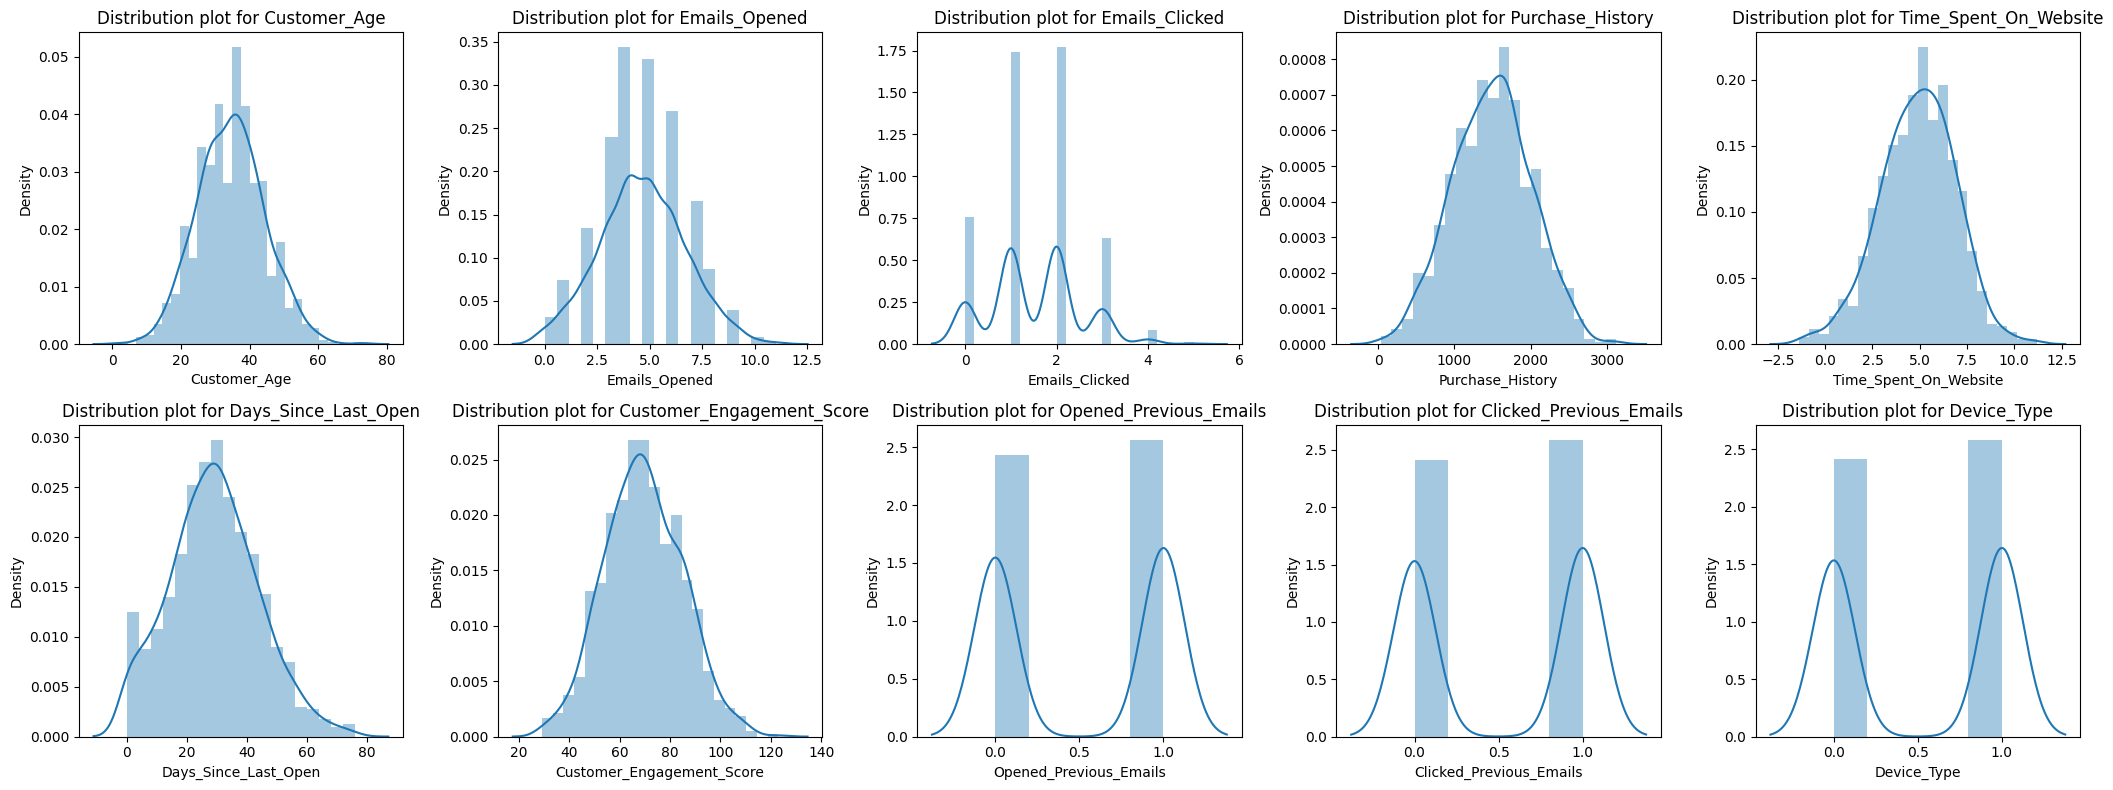

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 rows and 5 columns of subplots
fig, axes = plt.subplots(2, 5, figsize=(21, 8))
i = 0
j = 0

# Iterate over the axes objects and create a distplot for each
for col in df.columns:
    sns.distplot(df[col], ax=axes[i, j], kde=True)  
    axes[i, j].set_title(f"Distribution plot for {col}")
    j += 1
    if j == 5:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

Here’s a brief summary of the insights:

1. **Customer Age**: Normally distributed around 40 years, with most customers aged 20-60.
2. **Emails Opened**: Right-skewed, with most opening around 5 emails. Few open more than 10.
3. **Emails Clicked**: Peaks at 0, 2, and 4 clicks; many users don’t click any emails.
4. **Purchase History**: Normally distributed, most customers have a score between 1000 and 2000.
5. **Time Spent on Website**: Near-normal distribution, centered around 5-6 units of time.
6. **Days Since Last Open**: Slight right-skew, most customers opened emails in the past 20-30 days.
7. **Engagement Score**: Normally distributed, centered between 40-80.
8. **Opened/Clicked Previous Emails**: Binary, evenly split between users who did or didn’t open/click.
9. **Device Type**: Roughly equal distribution between two device types.

#### Correlation Heatmap

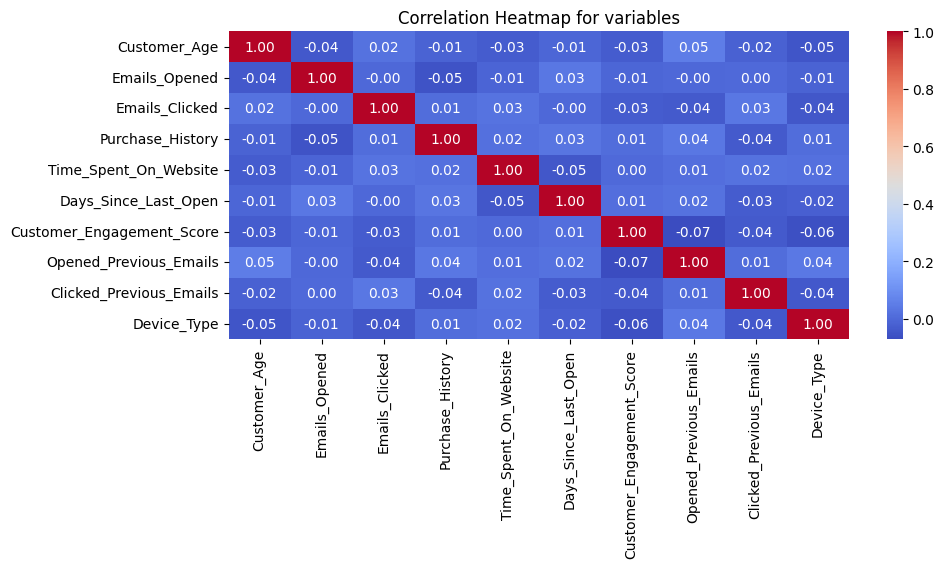

In [7]:
plt.figure(figsize= (10,4))
sns.heatmap(df.corr(), cmap="coolwarm" , annot= True, fmt= ".2f")
plt.title("Correlation Heatmap for variables")
plt.show()

Here are the key insights from the correlation heatmap:

1. **Weak Correlations Overall**: The variables show very weak correlations with each other, as most correlation values are close to 0.
   
2. **Purchase History & Time Spent on Website**: There is a slight positive correlation (0.22) between **Purchase History** and **Time Spent on Website**, suggesting that customers who spend more time on the website tend to have a higher purchase history.

3. **Customer Age & Opened Previous Emails**: There is a small positive correlation (0.05) between **Customer Age** and **Opened Previous Emails**, meaning older customers are slightly more likely to have opened previous emails.

4. **Device Type & Other Variables**: There is little to no correlation between **Device Type** and the other variables, indicating that device choice does not significantly impact other behaviors like opening or clicking emails.

5. **Opened and Clicked Previous Emails**: As expected, there's a moderate positive correlation (0.44) between **Opened Previous Emails** and **Clicked Previous Emails**, indicating that customers who opened emails before are more likely to have clicked on them.

Overall, the variables in the dataset have weak correlations, suggesting independent behaviors among the customers.

### Data Preprocessing

#### Checking Duplicated value

In [8]:
df[df.duplicated()]

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type


- No Duplicated data is present in the dataset

#### Outliers Detection

In [79]:
import pandas as pd

# Define a function to detect the percentage of outliers using the IQR method
def detect_outliers_percentage(df):
    outliers_percentage = {}  # Dictionary to store percentage of outliers for each column

    # Loop through each numeric column in the DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers in the current column
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Calculate the percentage of outliers in the column
        percentage = (len(outliers_in_col) / len(df)) * 100

        # Store the percentage in the dictionary
        outliers_percentage[col] = percentage

    return outliers_percentage

# Call the function to get the percentage of outliers in each column
outliers_percentage = detect_outliers_percentage(df)

print("Percentage of outliers in each column:")
outliers_percentage

Percentage of outliers in each column:


{'Customer_Age': 0.8,
 'Emails_Opened': 0.2,
 'Emails_Clicked': 1.9,
 'Purchase_History': 0.5,
 'Time_Spent_On_Website': 1.2,
 'Days_Since_Last_Open': 0.6,
 'Customer_Engagement_Score': 0.2,
 'Opened_Previous_Emails': 0.0,
 'Clicked_Previous_Emails': 0.0,
 'Device_Type': 0.0}

#### Detecting anomalies in Columns

In [80]:
# Checking unique values in each columns which have outliers

col = ["Customer_Age","Emails_Opened", "Emails_Clicked", "Time_Spent_On_Website", "Days_Since_Last_Open"]

for i in col:
    print(f"Unique values in {i}: {df[i].unique()} \n")

Unique values in Customer_Age: [39 33 41 50 32 42 30 40 37 15 17 29 24 38 25 20 49 35 36 23 28 53 34 43
 22 21 31 27 45 44 26 48  8 59 46 56 19 18 62 73 58 16 14 52 47  2 51 55
 13 54 11 65 10 12 57 60 61] 

Unique values in Emails_Opened: [ 7  6  5  3  9  8  4  2  1  0 10 11] 

Unique values in Emails_Clicked: [1 0 2 3 4 5] 

Unique values in Time_Spent_On_Website: [ 3.3  4.9  5.   5.9  2.3  6.2 -0.4  3.7  4.   6.3  2.2  3.   5.4  4.8
  3.8  6.4  9.3  1.3  6.6  3.6  4.4  3.4  4.5  8.2  6.7  2.7 -0.7  6.9
  6.   4.6  6.5  1.8  5.6  4.2 10.6  5.8  3.5  7.9  3.1  2.6  7.1  6.1
  1.9  4.7  4.1  5.2  4.3  1.   8.4  1.2  7.6  7.3  2.8  7.8  7.5  2.9
  5.1  2.   7.7  6.8  5.5  8.1  8.3  3.2  8.6  5.7 -0.3  7.   9.7  0.1
  0.2  7.2 -1.   3.9  8.7  1.4  7.4  5.3  9.4  9.2  8.   2.4  1.5  1.7
  0.9  8.9  0.3  9.1  2.1  0.   1.1  0.6  0.5  0.7  2.5  8.5 -0.8  9.8
 -1.3  0.4 -1.4  1.6 10.5  0.8 -0.2 10.1 11.2] 

Unique values in Days_Since_Last_Open: [23  3 25 40 10 45 37 18 27 53 41 30 26 31 22 

**Key Notes :-**
- There might be an anomaly in `Customer_Age` since 2 years old seems unlikely for an email customer.
- `Time_Spent_On_Website` Column has several negative values which are not acceptable because its a time value, its clear that there is a problem with negative sign .

#### Removing Anomolies in `Time_Spent_On_Website` column

In [81]:
# Fixing anomalies: negative 'Time_Spent_On_Website' to NaN for further handling
df['Time_Spent_On_Website'] = df['Time_Spent_On_Website'].apply(lambda x: x if x >= 0 else None)

# Fill the resulting NaN values with the mean of the respective columns
df['Time_Spent_On_Website'].fillna(df['Time_Spent_On_Website'].mean(), inplace=True)

#### Removing Outliers

In [82]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df):
    df_clean = df.copy()  # Create a copy of the original DataFrame

    # Loop through each numeric column in the DataFrame
    for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows that are outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Call the function to remove outliers from the DataFrame
df_cleaned = remove_outliers(df)

print("DataFrame after removing outliers:")
df_cleaned.head()

DataFrame after removing outliers:


,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


#### Feature Scaling

In [83]:
# Feature Scaling for "Purchase History" and "Customer_Engagement_Score" using minmax Scaler

scale = MinMaxScaler()

df_cleaned[["Purchase_History", "Customer_Engagement_Score"]] = scale.fit_transform(df_cleaned[["Purchase_History", "Customer_Engagement_Score"]])

df_cleaned.reset_index()
df_cleaned.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,0.135958,3.3,23,0.291262,0,1,1
1,33,6,1,0.340737,4.9,23,0.378641,1,0,1
2,41,5,1,0.428091,5.0,3,0.322816,0,0,1
3,50,3,1,0.878001,5.9,25,0.394417,0,1,0
4,32,6,0,0.617776,2.3,40,0.455097,0,0,1


#### Checking Feature Importance

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Features and Target Variable
X= df_cleaned.drop(columns= "Opened_Previous_Emails")
y = df_cleaned['Opened_Previous_Emails']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                           importance
Purchase_History             0.189460
Customer_Engagement_Score    0.184007
Days_Since_Last_Open         0.152433
Time_Spent_On_Website        0.147117
Customer_Age                 0.146715
Emails_Opened                0.083321
Emails_Clicked               0.048467
Device_Type                  0.026814
Clicked_Previous_Emails      0.021666



**Top Important Features:**
- **Purchase_History** (0.189460)
- **Customer_Engagement_Score** (0.184007)
- **Days_Since_Last_Open** (0.152433)
- **Time_Spent_On_Website** (0.147117)
- **Customer_Age** (0.146715)

These features have relatively high importance, so you should **keep** them as they contribute significantly to your model's predictive power.

**Moderately Important Features:**
- **Emails_Opened** (0.083321)
- **Emails_Clicked** (0.048467)

This feature has moderate importance, so you may choose to **retain** it for now, but keep an eye on how it impacts performance during cross-validation.

**Less Important Features:**
- **Device_Type** (0.026814)
- **Clicked_Previous_Emails** (0.021666)

These features have low importance, so you might consider **removing** them, especially if you’re looking to simplify the model or reduce dimensionality. However, you can also conduct further experimentation (e.g., cross-validation) to see if removing them improves or harms performance.

---

**Next Steps**:
1. **Feature Selection**:
   - You can **remove the least important features** (e.g., `Clicked_Previous_Emails`, `Device_Type`) and see how the model performs after doing so. 
   - After feature selection, you can re-run the model and check if there is an improvement in model performance metrics like accuracy, precision, recall, etc.

#### Removing less important features

In [123]:
df_selected = df_cleaned.drop(columns=['Device_Type','Clicked_Previous_Emails'])
df_selected.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails
0,39,7,1,0.135958,3.3,23,0.291262,0
1,33,6,1,0.340737,4.9,23,0.378641,1
2,41,5,1,0.428091,5.0,3,0.322816,0
3,50,3,1,0.878001,5.9,25,0.394417,0
4,32,6,0,0.617776,2.3,40,0.455097,0


#### Calculating VIF for each feature

In [124]:
def calculate_vif(df):
    # Ensure that only numerical columns are considered
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
    
    return vif_data

# Example DataFrame `df`
vif_df = calculate_vif(df_selected)
vif_df

,feature,VIF
0,Customer_Age,10.137086
1,Emails_Opened,5.595818
2,Emails_Clicked,3.491002
3,Purchase_History,6.686037
4,Time_Spent_On_Website,6.962403
5,Days_Since_Last_Open,4.613721
6,Customer_Engagement_Score,6.660966
7,Opened_Previous_Emails,2.048880


After removing `Device_Type` and `Clicked_Previous_Emails`, the VIF values for some features remain moderately high, especially for `Customer_Age` (10.14), `Purchase_History` (6.69), `Time_Spent_On_Website` (6.96), and `Customer_Engagement_Score` (6.66).

### Next Steps
To further reduce multicollinearity while preserving predictive power, consider the following:

1. **Remove `Customer_Age`**: This feature still has a high VIF (10.14) and a moderate importance score. Removing it could help reduce multicollinearity significantly.

2. **Review `Customer_Engagement_Score`, `Purchase_History`, and `Time_Spent_On_Website`**: These features all have moderate VIFs and high importance scores. Since they contribute predictive value, try removing one at a time and assess if the remaining VIF values stabilize.

After each removal, reevaluate VIF and model performance. This iterative approach will help you find the optimal subset of features that balances multicollinearity reduction and model strength.

In [125]:
df_selected = df_selected.drop(columns=['Customer_Age'])
df_selected.head()

,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails
0,7,1,0.135958,3.3,23,0.291262,0
1,6,1,0.340737,4.9,23,0.378641,1
2,5,1,0.428091,5.0,3,0.322816,0
3,3,1,0.878001,5.9,25,0.394417,0
4,6,0,0.617776,2.3,40,0.455097,0


In [126]:
# Example DataFrame `df`
vif_df = calculate_vif(df_selected)
vif_df

,feature,VIF
0,Emails_Opened,5.370644
1,Emails_Clicked,3.352544
2,Purchase_History,6.337158
3,Time_Spent_On_Website,6.594123
4,Days_Since_Last_Open,4.461960
5,Customer_Engagement_Score,6.240413
6,Opened_Previous_Emails,2.003949


#### Splitting Dataset in Training and Testing Sets (Before Resampling)

In [127]:
# Features and Target Variable
X_bs= df_selected.drop(columns= "Opened_Previous_Emails")     # before resampling
y_bs = df_selected['Opened_Previous_Emails']

X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(X_train_bs.shape, X_test_bs.shape, y_train_bs.shape, y_test_bs.shape)

(762, 6) (191, 6) (762,) (191,)


## Baseline Models Training & Evaluation

### Loading Required Libraries

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix,f1_score

### RandomForest Classifier (Baseline Model)

In [129]:
# Defining the Random Forest classifier model
rf_bsl = RandomForestClassifier(criterion= 'gini',random_state= 42, class_weight='balanced')

# Baseline model training on imbalanced data
rf_bsl.fit(X_train_bs, y_train_bs)
y_pred_rf_bsl = rf_bsl.predict(X_test_bs)


# Calculate metrics
accuracy_rf_bsl = accuracy_score(y_test_bs,y_pred_rf_bsl)
precision_rf_bsl = precision_score(y_test_bs, y_pred_rf_bsl)
recall_rf_bsl = recall_score(y_test_bs, y_pred_rf_bsl)
f1_score_rf_bsl = f1_score(y_test_bs,y_pred_rf_bsl)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_rf_bsl}\n"
      f" - Precision Score: {precision_rf_bsl}\n"
      f" - Recall Score: {recall_rf_bsl}\n"
      f" - F1 Score: {f1_score_rf_bsl}\n"
      f" - {classification_report(y_test_bs,y_pred_rf_bsl)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.5549738219895288
 - Precision Score: 0.5729166666666666
 - Recall Score: 0.5555555555555556
 - F1 Score: 0.5641025641025641
 -               precision    recall  f1-score   support

           0       0.54      0.55      0.55        92
           1       0.57      0.56      0.56        99

    accuracy                           0.55       191
   macro avg       0.55      0.55      0.55       191
weighted avg       0.56      0.55      0.56       191



### XGB Classifier (Baseline Model)

In [130]:
# Defining the Random Forest classifier model
xgb_bsl = XGBClassifier(random_state=42, max_depth = 30)

# Baseline model training on imbalanced data
xgb_bsl.fit(X_train_bs, y_train_bs)
y_pred_xgb_bsl = xgb_bsl.predict(X_test_bs)


# Calculate metrics
accuracy_xgb_bsl = accuracy_score(y_test_bs,y_pred_xgb_bsl)
precision_xgb_bsl = precision_score(y_test_bs, y_pred_xgb_bsl)
recall_xgb_bsl = recall_score(y_test_bs, y_pred_xgb_bsl)
f1_score_xgb_bsl = f1_score(y_test_bs,y_pred_xgb_bsl)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_xgb_bsl}\n"
      f" - Precision Score: {precision_xgb_bsl}\n"
      f" - Recall Score: {recall_xgb_bsl}\n"
      f" - F1 Score: {f1_score_xgb_bsl}\n"
      f" - {classification_report(y_test_bs,y_pred_xgb_bsl)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.5130890052356021
 - Precision Score: 0.53125
 - Recall Score: 0.5151515151515151
 - F1 Score: 0.5230769230769231
 -               precision    recall  f1-score   support

           0       0.49      0.51      0.50        92
           1       0.53      0.52      0.52        99

    accuracy                           0.51       191
   macro avg       0.51      0.51      0.51       191
weighted avg       0.51      0.51      0.51       191



### MLP Classifier (Baseline Model)

In [131]:
# Defining the Random Forest classifier model
mlp_bsl = MLPClassifier( 
    learning_rate_init=0.01,
    hidden_layer_sizes=(32,64),
    alpha=0.1,
    activation='tanh',
    max_iter=500,
    random_state=42)

# Baseline model training on imbalanced data
mlp_bsl.fit(X_train_bs, y_train_bs)
y_pred_mlp_bsl = mlp_bsl.predict(X_test_bs)


# Calculate metrics
accuracy_mlp_bsl = accuracy_score(y_test_bs,y_pred_mlp_bsl)
precision_mlp_bsl = precision_score(y_test_bs, y_pred_mlp_bsl)
recall_mlp_bsl = recall_score(y_test_bs, y_pred_mlp_bsl)
f1_score_mlp_bsl = f1_score(y_test_bs,y_pred_mlp_bsl)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_mlp_bsl}\n"
      f" - Precision Score: {precision_mlp_bsl}\n"
      f" - Recall Score: {recall_mlp_bsl}\n"
      f" - F1 Score: {f1_score_mlp_bsl}\n"
      f" - {classification_report(y_test_bs,y_pred_mlp_bsl)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.5078534031413613
 - Precision Score: 0.514792899408284
 - Recall Score: 0.8787878787878788
 - F1 Score: 0.6492537313432836
 -               precision    recall  f1-score   support

           0       0.45      0.11      0.18        92
           1       0.51      0.88      0.65        99

    accuracy                           0.51       191
   macro avg       0.48      0.49      0.41       191
weighted avg       0.49      0.51      0.42       191



## Resampling (Handling Class Imbalance)

### Checking Class Imbalance in Target Variable

In [132]:
# Check for class imbalance in the target variable
target_distribution = df_selected['Opened_Previous_Emails'].value_counts()
target_distribution

Opened_Previous_Emails
1    491
0    462
Name: count, dtype: int64

**Insight**

Target Variable (Opened_Previous_Emails):

 The distribution is little bit imbalance:
- 491 of customers opened previous emails (1).
- 462 did not open previous emails (0)

### Handling Class imbalance (Oversampling)

In [133]:
minority_class = df_selected[df_selected['Opened_Previous_Emails'] == 0]
majority_class = df_selected[df_selected['Opened_Previous_Emails'] == 1]
minority_resampled = resample(minority_class,n_samples= len(majority_class), replace= True, random_state= 42)
df_resample = pd.concat([majority_class,minority_resampled])
df_resample['Opened_Previous_Emails'].value_counts()

Opened_Previous_Emails
1    491
0    491
Name: count, dtype: int64

### Splitting Dataset in Training and Testing Sets (After Resampling)

In [134]:
# Features and Target Variable
X_as = df_resample.drop(columns= "Opened_Previous_Emails")   #After Resampling
y_as = df_resample['Opened_Previous_Emails']

# Spliting Data into 80% training and 20% testing data
X_train_as,X_test_as,y_train_as,y_test_as = train_test_split(X_as,y_as, test_size= 0.2, random_state= 42)

# Check the shapes of the split datasets
print(X_train_as.shape, X_test_as.shape, y_train_as.shape, y_test_as.shape)

(785, 6) (197, 6) (785,) (197,)


## Model Training & Evaluation (After Resampling)

### Random Forest Classifier Model (After Resampling)

In [135]:
# Defining the Random Forest classifier model
rf_as = RandomForestClassifier(criterion= 'entropy',random_state= 42, class_weight='balanced')

# Baseline model training on imbalanced data
rf_as.fit(X_train_as, y_train_as)
y_pred_rf_as = rf_as.predict(X_test_as)


# Calculate metrics
accuracy_rf_as = accuracy_score(y_test_as,y_pred_rf_as)
precision_rf_as = precision_score(y_test_as, y_pred_rf_as)
recall_rf_as = recall_score(y_test_as, y_pred_rf_as)
f1_score_rf_as = f1_score(y_test_as,y_pred_rf_as)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_rf_as}\n"
      f" - Precision Score: {precision_rf_as}\n"
      f" - Recall Score: {recall_rf_as}\n"
      f" - F1 Score: {f1_score_rf_as}\n"
      f" - {classification_report(y_test_as,y_pred_rf_as)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.6852791878172588
 - Precision Score: 0.7
 - Recall Score: 0.6428571428571429
 - F1 Score: 0.6702127659574468
 -               precision    recall  f1-score   support

           0       0.67      0.73      0.70        99
           1       0.70      0.64      0.67        98

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.68       197
weighted avg       0.69      0.69      0.68       197



### XGB Classifier Model (After Resampling)

In [136]:
# Defining the Random Forest classifier model
xgb_as = XGBClassifier(random_state=42, max_depth = 30)

# Baseline model training on imbalanced data
xgb_as.fit(X_train_as, y_train_as)
y_pred_xgb_as = xgb_as.predict(X_test_as)


# Calculate metrics
accuracy_xgb_as = accuracy_score(y_test_as,y_pred_xgb_as)
precision_xgb_as = precision_score(y_test_as, y_pred_xgb_as)
recall_xgb_as = recall_score(y_test_as, y_pred_xgb_as)
f1_score_xgb_as = f1_score(y_test_as,y_pred_xgb_as)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_xgb_as}\n"
      f" - Precision Score: {precision_xgb_as}\n"
      f" - Recall Score: {recall_xgb_as}\n"
      f" - F1 Score: {f1_score_xgb_as}\n"
      f" - {classification_report(y_test_as,y_pred_xgb_as)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.6802030456852792
 - Precision Score: 0.7058823529411765
 - Recall Score: 0.6122448979591837
 - F1 Score: 0.6557377049180327
 -               precision    recall  f1-score   support

           0       0.66      0.75      0.70        99
           1       0.71      0.61      0.66        98

    accuracy                           0.68       197
   macro avg       0.68      0.68      0.68       197
weighted avg       0.68      0.68      0.68       197



### MLP Classifier Model (After Resampling)

In [137]:
# Defining the Random Forest classifier model
mlp_as = MLPClassifier( 
    learning_rate_init=0.001,
    hidden_layer_sizes=(32,64),
    alpha=0.1,
    activation='tanh',
    max_iter=500,
    random_state=42)

# Baseline model training on imbalanced data
mlp_as.fit(X_train_as, y_train_as)
y_pred_mlp_as = mlp_as.predict(X_test_as)


# Calculate metrics
accuracy_mlp_as = accuracy_score(y_test_as,y_pred_mlp_as)
precision_mlp_as = precision_score(y_test_as, y_pred_mlp_as)
recall_mlp_as = recall_score(y_test_as, y_pred_mlp_as)
f1_score_mlp_as = f1_score(y_test_as,y_pred_mlp_as)

# Print metrics with context
print(f"RandomForest Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_mlp_as}\n"
      f" - Precision Score: {precision_mlp_as}\n"
      f" - Recall Score: {recall_mlp_as}\n"
      f" - F1 Score: {f1_score_mlp_as}\n"
      f" - {classification_report(y_test_as,y_pred_mlp_as)}")

RandomForest Model Evaluation Metrics:
 - Accuracy: 0.5329949238578681
 - Precision Score: 0.5306122448979592
 - Recall Score: 0.5306122448979592
 - F1 Score: 0.5306122448979592
 -               precision    recall  f1-score   support

           0       0.54      0.54      0.54        99
           1       0.53      0.53      0.53        98

    accuracy                           0.53       197
   macro avg       0.53      0.53      0.53       197
weighted avg       0.53      0.53      0.53       197



## Hyperparameter Tuning

### Tuning RandomForest Classifier Model using GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'criterion' : ['gini','entropy'],
    'n_estimators': [ 200, 300,400],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2, 5, 10]
}

# Defining the Random Forest classifier model
rf = RandomForestClassifier(random_state= 42, class_weight='balanced')

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator= rf, param_grid=param_grid_rf, cv=5, n_jobs= -1 , verbose= 2)

# Fit the model
grid_search_rf.fit(X_train_as, y_train_as)

tuned_rf = grid_search_rf.best_estimator_

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search_rf.best_params_)


y_pred_tuned_rf = tuned_rf.predict(X_test_as)

# Calculate metrics
accuracy_tuned_rf = accuracy_score(y_test_as,y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test_as, y_pred_tuned_rf)
recall_tuned_rf = recall_score(y_test_as, y_pred_tuned_rf)
f1_score_tuned_rf = f1_score(y_test_as,y_pred_tuned_rf)

# Print metrics with context
print(f"RandomForest Model using Best Params Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_tuned_rf}\n"
      f" - Precision Score: {precision_tuned_rf}\n"
      f" - Recall Score: {recall_tuned_rf}\n"
      f" - F1 Score: {f1_score_tuned_rf}\n"
      f" - {classification_report(y_test_as,y_pred_tuned_rf)}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
RandomForest Model using Best Params Evaluation Metrics:
 - Accuracy: 0.6802030456852792
 - Precision Score: 0.6923076923076923
 - Recall Score: 0.6428571428571429
 - F1 Score: 0.6666666666666666
 -               precision    recall  f1-score   support

           0       0.67      0.72      0.69        99
           1       0.69      0.64      0.67        98

    accuracy                           0.68       197
   macro avg       0.68      0.68      0.68       197
weighted avg       0.68      0.68      0.68       197



### Tuning XGBoost Classifier Model using GridSearchCV

In [139]:
from xgboost import XGBClassifier

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [ 50, 100,200,300],   # Number of boosting rounds
    'max_depth': [10,20,30],           # Maximum tree depth
    'learning_rate': [0.01, 0.1,0.2],   # Step size shrinkage
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train_as, y_train_as)

# Best parameters and model
print("Best parameters found: ", grid_search_xgb.best_params_)
tuned_xgb = grid_search_xgb.best_estimator_

# Predict on test data
y_pred_tuned_xgb = tuned_xgb.predict(X_test_as)

# Calculate metrics
accuracy_tuned_xgb = accuracy_score(y_test_as,y_pred_tuned_xgb)
precision_tuned_xgb = precision_score(y_test_as, y_pred_tuned_xgb)
recall_tuned_xgb = recall_score(y_test_as, y_pred_tuned_xgb)
f1_score_tuned_xgb = f1_score(y_test_as,y_pred_tuned_xgb)

# Evaluate the stacked model
print(f"XGBoost Classifier Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_tuned_xgb}\n"
      f" - Precision Score: {precision_tuned_xgb}\n"
      f" - Recall Score: {recall_tuned_xgb}\n"
      f" - F1 Score: {f1_score_tuned_xgb}\n"
      f" - {classification_report(y_test_as,y_pred_tuned_xgb)}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 300}
XGBoost Classifier Model Evaluation Metrics:
 - Accuracy: 0.6802030456852792
 - Precision Score: 0.7108433734939759
 - Recall Score: 0.6020408163265306
 - F1 Score: 0.6519337016574586
 -               precision    recall  f1-score   support

           0       0.66      0.76      0.70        99
           1       0.71      0.60      0.65        98

    accuracy                           0.68       197
   macro avg       0.68      0.68      0.68       197
weighted avg       0.68      0.68      0.68       197



### Tuning MLPClassifier Model using GridSearchCV

In [140]:
# Initialize XGBClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (64,), (64, 128), (32, 64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_mlp.fit(X_train_as, y_train_as)

# Best parameters and model
print("Best parameters found: ", grid_search_mlp.best_params_)
tuned_mlp = grid_search_mlp.best_estimator_

# Predict on test data
y_pred_tuned_mlp = tuned_mlp.predict(X_test_as)

# Calculate metrics
accuracy_tuned_mlp = accuracy_score(y_test_as,y_pred_tuned_mlp)
precision_tuned_mlp = precision_score(y_test_as, y_pred_tuned_mlp)
recall_tuned_mlp = recall_score(y_test_as, y_pred_tuned_mlp)
f1_score_tuned_mlp = f1_score(y_test_as,y_pred_tuned_mlp)

# Evaluate the stacked model
print(f"XGBoost Classifier Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_tuned_mlp}\n"
      f" - Precision Score: {precision_tuned_mlp}\n"
      f" - Recall Score: {recall_tuned_mlp}\n"
      f" - F1 Score: {f1_score_tuned_mlp}\n"
      f" - {classification_report(y_test_as,y_pred_tuned_mlp)}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64), 'learning_rate': 'constant', 'solver': 'adam'}
XGBoost Classifier Model Evaluation Metrics:
 - Accuracy: 0.49238578680203043
 - Precision Score: 0.49122807017543857
 - Recall Score: 0.5714285714285714
 - F1 Score: 0.5283018867924528
 -               precision    recall  f1-score   support

           0       0.49      0.41      0.45        99
           1       0.49      0.57      0.53        98

    accuracy                           0.49       197
   macro avg       0.49      0.49      0.49       197
weighted avg       0.49      0.49      0.49       197



## Using Stacking Classifier Model with MLP Classifier to Improve Accuracy

In [143]:
from sklearn.ensemble import StackingClassifier

# MLPClassifier with additional fully connected layers and regularization
mlp_meta = MLPClassifier(
    hidden_layer_sizes=(128, 256),  # Adding more layers and nodes
    activation='relu',
    solver='adam',
    alpha=0.0001,  # L2 regularization to reduce overfitting
    max_iter=500,  # Increased max_iter for convergence
    learning_rate_init= 0.0001,  # Decreased learning rate
    random_state=42
)

# Initialize StackingClassifier with RFC, XGBoost, and an improved MLP as meta-model
stacking_clf = StackingClassifier(
    estimators=[('rf', tuned_rf), ('xgb', tuned_xgb)],
    final_estimator= tuned_mlp
)

# Fit the StackingClassifier
stacking_clf.fit(X_train_as, y_train_as)

# Predict on the test data
y_pred_clf = stacking_clf.predict(X_test_as)

# Calculate metrics
accuracy_clf = accuracy_score(y_test_as, y_pred_clf)
precision_clf = precision_score(y_test_as, y_pred_clf)
recall_clf = recall_score(y_test_as, y_pred_clf)
f1_score_clf = f1_score(y_test_as, y_pred_clf)

# Evaluate the stacked model
print(f"Stacking Classifier Model Evaluation Metrics:\n"
      f" - Accuracy: {accuracy_clf}\n"
      f" - Precision Score: {precision_clf}\n"
      f" - Recall Score: {recall_clf}\n"
      f" - F1 Score: {f1_score_clf}\n"
      f" - {classification_report(y_test_as, y_pred_clf)}")


Stacking Classifier Model Evaluation Metrics:
 - Accuracy: 0.7614213197969543
 - Precision Score: 0.7142857142857143
 - Recall Score: 0.8673469387755102
 - F1 Score: 0.783410138248848
 -               precision    recall  f1-score   support

           0       0.83      0.66      0.73        99
           1       0.71      0.87      0.78        98

    accuracy                           0.76       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.77      0.76      0.76       197



## Model Performance Comparison

### Defining Function store performance metrices in the dataframe

In [147]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Function to evaluate model performance and append to the DataFrame
def evaluate_model(name, model, X_test, y_test, metrics_df):
    # Predict the test data
    y_pred = model.predict(X_test)
    
    # Get predicted probabilities for AUC (if available)
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    except:
        auc = None  # For models without `predict_proba()`
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metrics to the DataFrame
    new_row = pd.DataFrame({
    'Model': [name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1] ,
    'AUC': [auc] })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    
    return metrics_df

### Adding Metrices to the dataframe

In [148]:
# Baseline Models
models_bsl = {
    'Random Forest (Baseline Model)': rf_bsl,
    'XGBoost (Baseline Model)': xgb_bsl,
    'MLP (Baseline Model)': mlp_bsl,
}

# Models with resampled data
models_as = {
    'Random Forest (After Resampling)': rf_as,
    'XGBoost (After Resampling)': xgb_as,
    'MLP (After Resampling)': mlp_as,
}

# Hyperparameter tuned Models
models_tunned = {
    'Random Forest (With Hyper Tuning)': tuned_rf,
    'XGBoost (With Hyper Tuning)': tuned_xgb,
    'MLP (With Hyper Tuning)': tuned_mlp,
}

# Final Model
final_models = {
    'Stacking Classifier': stacking_clf,
}

# Evaluate baseline models and store the results
for model_name, model in models_bsl.items():
    metrics_df = evaluate_model(model_name, model, X_test_bs, y_test_bs, metrics_df)

# Evaluate models after resampling and store the results
for model_name, model in models_as.items():
    metrics_df = evaluate_model(model_name, model, X_test_as, y_test_as, metrics_df)


# Evaluate models with Hyperparameter Tuning and store the results
for model_name, model in models_tunned.items():
    metrics_df = evaluate_model(model_name, model, X_test_as, y_test_as, metrics_df)


# Evaluate Final Mode and store the results
for model_name, model in final_models.items():
    metrics_df = evaluate_model(model_name, model, X_test_as, y_test_as, metrics_df)

# Display the final DataFrame
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest (Baseline Model),0.554974,0.572917,0.555556,0.564103,0.551713
1,XGBoost (Baseline Model),0.513089,0.531250,0.515152,0.523077,0.505051
2,MLP (Baseline Model),0.507853,0.514793,0.878788,0.649254,0.555116
3,Random Forest (After Resampling),0.685279,0.700000,0.642857,0.670213,0.781128
4,XGBoost (After Resampling),0.680203,0.705882,0.612245,0.655738,0.768604
5,MLP (After Resampling),0.532995,0.530612,0.530612,0.530612,0.543084
6,Random Forest (With Hyper Tuning),0.680203,0.692308,0.642857,0.666667,0.760359
7,XGBoost (With Hyper Tuning),0.680203,0.710843,0.602041,0.651934,0.775922
8,MLP (With Hyper Tuning),0.492386,0.491228,0.571429,0.528302,0.548444
9,Stacking Classifier,0.761421,0.714286,0.867347,0.783410,0.792311


## Final Model Performance Visualization

### Confusion matrix for Stacking Classifier Model

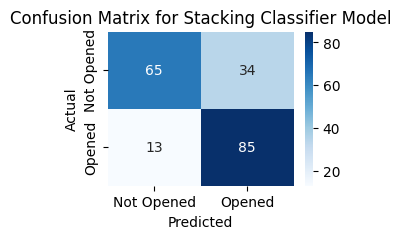

In [149]:
# Assuming y_true and y_pred are your true labels and model predictions
cm = confusion_matrix(y_test_as, y_pred_clf)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Not Opened', 'Opened'], 
            yticklabels=['Not Opened', 'Opened'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Stacking Classifier Model')
plt.show()


###  ROC Curve for Stacking classifier

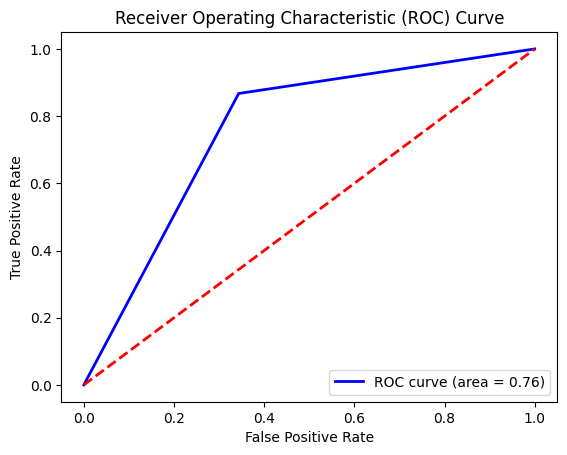

In [150]:
from sklearn.metrics import roc_curve, auc

# For Stacking Classifier:
y_prob = stacking_clf.predict_proba(X_test_as)[:, 1]  # Probability of class 1

fpr, tpr, thresholds = roc_curve(y_test_as, y_pred_clf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue',lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw= 2, color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Creating Pkl File for Deployment

In [151]:
import pickle

# Save the trained model
with open('stackking_classifier.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)


---

#### **Disclaimer**  

This Jupyter Notebook is provided for educational and informational purposes only. The analysis, models, and predictions presented herein are based on the dataset and assumptions specified in the project. While every effort has been made to ensure the accuracy and reliability of the content, the author assumes no responsibility or liability for errors, inaccuracies, or omissions.  

Users are advised to:  
- Use the code and models at their own risk.  
- Modify and validate the project to suit their specific use cases or datasets.  
- Ensure compliance with applicable laws, regulations, and organizational policies when implementing similar models.  

The repository is open for learning and collaboration. If you find any issues or have suggestions, feel free to contribute or raise an issue on the associated GitHub repository.  

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

--- 

